# HW1

## Read in資料

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [32]:
btc_raw = pd.read_csv("../data/btc_PERP.csv",parse_dates=True, index_col='startTime')
funding_raw = pd.read_csv("../data/BTC_funding.csv",parse_dates=True, index_col='time')

In [33]:
btc_raw.head(10)

,open,high,low,close,volume
startTime,,,,,
2020-12-31 16:00:00+00:00,28795.5,28837.0,28778.5,28829.0,3.446501e+06
2020-12-31 16:01:00+00:00,28829.0,28838.0,28736.5,28742.5,1.504040e+06
2020-12-31 16:02:00+00:00,28745.0,28761.0,28707.5,28713.0,2.565665e+06
2020-12-31 16:03:00+00:00,28713.0,28737.5,28700.0,28711.0,7.606752e+05
2020-12-31 16:04:00+00:00,28711.0,28750.5,28700.5,28735.0,1.022127e+06
2020-12-31 16:05:00+00:00,28735.0,28766.5,28735.0,28755.0,1.160651e+06
2020-12-31 16:06:00+00:00,28755.0,28767.5,28745.0,28750.0,9.302853e+05
2020-12-31 16:07:00+00:00,28750.0,28750.0,28714.5,28714.5,1.187186e+05
2020-12-31 16:08:00+00:00,28714.5,28740.0,28701.0,28740.0,2.580775e+05


In [34]:
btc_raw.resample(rule='3T', closed='left', label='left').first()

,open,high,low,close,volume
startTime,,,,,
2020-12-31 16:00:00+00:00,28795.5,28837.0,28778.5,28829.0,3.446501e+06
2020-12-31 16:03:00+00:00,28713.0,28737.5,28700.0,28711.0,7.606752e+05
2020-12-31 16:06:00+00:00,28755.0,28767.5,28745.0,28750.0,9.302853e+05
2020-12-31 16:09:00+00:00,28740.0,28744.0,28730.0,28731.5,9.870523e+04
2020-12-31 16:12:00+00:00,28723.5,28732.0,28692.0,28692.5,3.643328e+05
...,...,...,...,...,...
2022-07-22 00:27:00+00:00,23233.0,23249.0,23215.0,23249.0,1.132647e+06
2022-07-22 00:30:00+00:00,23233.0,23248.0,23227.0,23247.0,9.057454e+05
2022-07-22 00:33:00+00:00,23283.0,23359.0,23279.0,23350.0,1.176338e+07


In [35]:
# funding.head(10)

## Resample

In [36]:
rule = '1D'

d1 = btc_raw.resample(rule=rule, closed='left', label='left').first()[['open']]
d2 = btc_raw.resample(rule=rule, closed='left', label='left').max()[['high']]
d3 = btc_raw.resample(rule=rule, closed='left', label='left').min()[['low']]
d4 = btc_raw.resample(rule=rule, closed='left', label='left').last()[['close']]
d5 = btc_raw.resample(rule=rule, closed='left', label='left').sum()[['volume']]


btc = pd.concat([d1,d2,d3,d4,d5], axis=1)
btc.head(10)

,open,high,low,close,volume
startTime,,,,,
2020-12-31 00:00:00+00:00,28795.5,29213.5,28320.0,28956.5,5.831936e+08
2021-01-01 00:00:00+00:00,28956.0,29731.0,28675.0,29410.5,1.191753e+09
2021-01-02 00:00:00+00:00,29410.5,33486.5,29028.0,32201.5,3.612341e+09
2021-01-03 00:00:00+00:00,32201.5,34888.0,32004.0,33100.0,3.372769e+09
2021-01-04 00:00:00+00:00,33100.0,33709.5,27667.5,32053.5,3.885166e+09
2021-01-05 00:00:00+00:00,32060.5,34584.0,29884.0,34107.5,2.919798e+09
2021-01-06 00:00:00+00:00,34107.5,37107.5,33385.5,36890.5,3.133418e+09
2021-01-07 00:00:00+00:00,36890.5,40586.0,36341.0,39527.0,3.939193e+09
2021-01-08 00:00:00+00:00,39521.0,42128.0,36610.5,40644.0,5.700024e+09


In [38]:
rule = '1H'
btc_hour = btc_raw.resample(rule=rule, closed='right', label='right').first()[['open']]

df_funding = pd.concat([btc_hour, funding_raw], axis=1)
df_funding = df_funding.fillna(method='bfill', limit=2).fillna(0)
df_funding

,open,rate
2020-12-31 16:00:00+00:00,28795.5,-0.000007
2020-12-31 17:00:00+00:00,28829.0,-0.000007
2020-12-31 18:00:00+00:00,28414.5,-0.000016
2020-12-31 19:00:00+00:00,28550.5,-0.000017
2020-12-31 20:00:00+00:00,28878.0,-0.000014
...,...,...
2022-07-21 21:00:00+00:00,23193.0,0.000000
2022-07-21 22:00:00+00:00,23128.0,0.000000
2022-07-21 23:00:00+00:00,23172.0,0.000000
2022-07-22 00:00:00+00:00,23029.0,0.000000


## 計算指標

In [8]:
from talib import abstract
plt.style.use('seaborn')

### Stochastic (STOCH)(隨機指標)

ref:
- https://www.cmoney.tw/learn/course/technicals/topic/484 (定義好像不太一樣)
- https://www.tradingview.com/support/solutions/43000502332-stochastic-stoch/ (Tradingview用FASTK跟FASTD)
```

                 (Today's Close - LowestLow)
FASTK(Kperiod) = --------------------------- * 100
                  (HighestHigh - LowestLow)

FASTD(FastDperiod) = MA Smoothed FASTK over FastDperiod

SLOWK(SlowKperiod) = MA Smoothed FASTK over SlowKperiod

SLOWD(SlowDperiod) = MA Smoothed SLOWK over SlowDperiod

```

In [39]:
# MA_Type: 0=SMA, 1=EMA, 2=WMA, 3=DEMA, 4=TEMA, 5=TRIMA, 6=KAMA, 7=MAMA, 8=T3 (Default=SMA)
# http://30daydo.com/article/201

STOCHF = abstract.STOCHF(btc, fastk_period=14, fastd_period=3, fastd_matype=0)

In [40]:
# month_stochF = STOCHF["2022-01-01 00:00:00+00:00":"2022-07-01 00:00:00+00:00"]
# month_btc = btc["2022-01-01 00:00:00+00:00":"2022-07-01 00:00:00+00:00"]

## Simple Stochastic Strategy

In [41]:
# store the date and time k crossed d
k_crossed_d_bull = []
k_crossed_d_bear = []
# fastk = np.array(month_stochF['fastk'])
# fastd = np.array(month_stochF['fastd'])
# btc_price = np.array(month_btc['close'])
fastk = np.array(STOCHF['fastk'])
fastd = np.array(STOCHF['fastd'])
btc_price = np.array(btc['close'])

for i in range(len(fastk) - 2): # exclude the first day and last day
    # crossed upward and in overbought position
    if(fastk[i+1] >= fastd[i+1] and fastk[i] < fastd[i] and fastd[i] < 20):
        k_crossed_d_bull.append(btc.iloc[i+1].name)
    # crossed downward and in oversold position
    elif(fastk[i+1] <= fastd[i+1] and fastk[i] > fastd[i] and fastd[i] > 80):
        k_crossed_d_bear.append(btc.iloc[i+1].name)

26 33


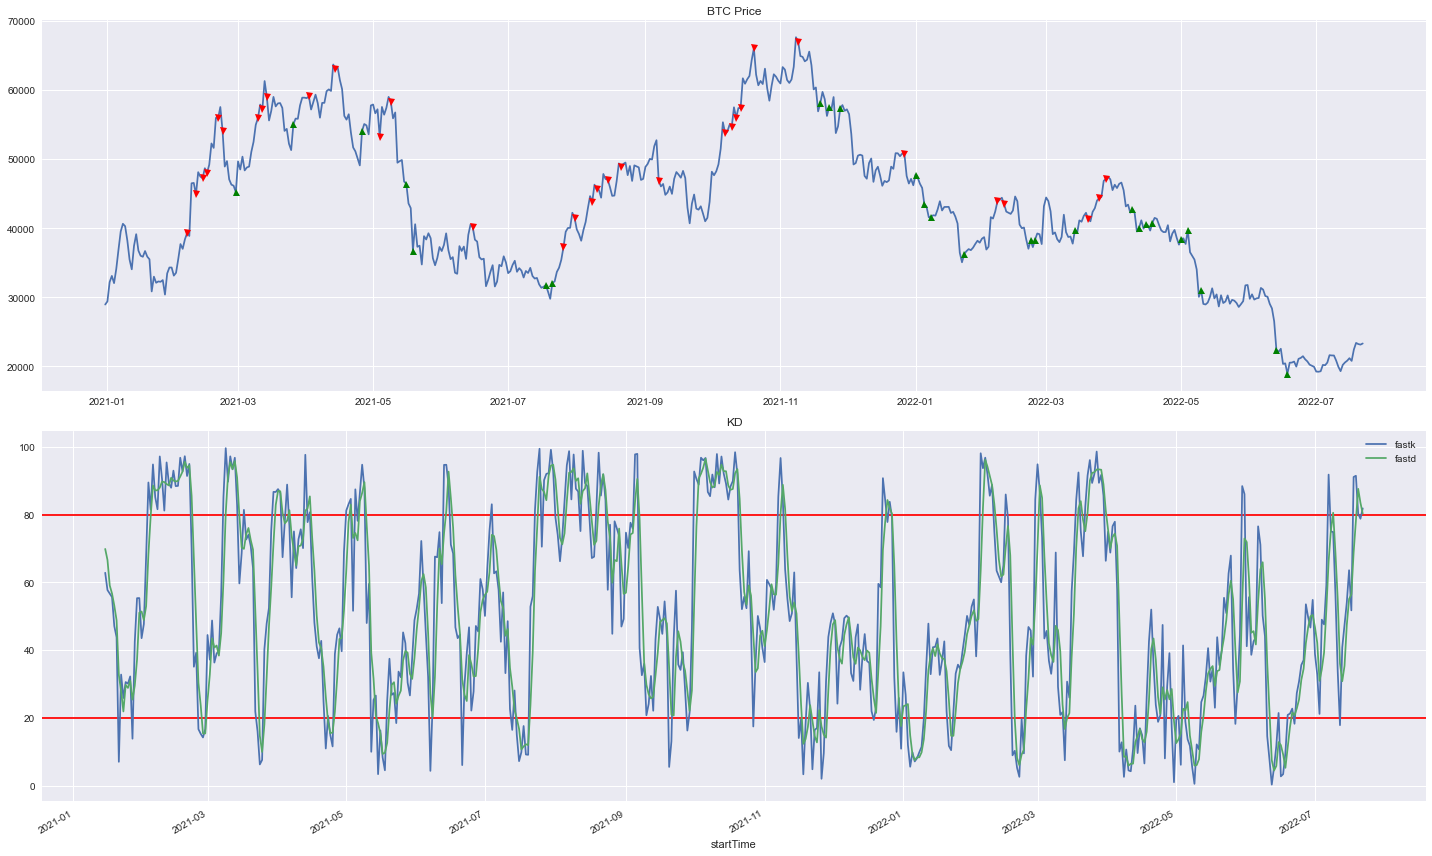

In [42]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.title("BTC Price")
# plt.plot(month_btc['close'])
# plt.plot(month_btc.loc[k_crossed_d_bull]['close'],'g^')
# plt.plot(month_btc.loc[k_crossed_d_bear]['close'],'rv')
plt.plot(btc['close'])
plt.plot(btc.loc[k_crossed_d_bull]['close'],'g^')
plt.plot(btc.loc[k_crossed_d_bear]['close'],'rv')
plt.subplot(2,1,2)
plt.title("KD")
plt.axhline(y=80,color='r')
plt.axhline(y=20,color='r')
# month_stochF['fastk'].plot(label='fastk')
# month_stochF['fastd'].plot(label='fastd')
STOCHF['fastk'].plot(label='fastk')
STOCHF['fastd'].plot(label='fastd')
plt.legend(loc = 0)
plt.tight_layout()

print(len(k_crossed_d_bull),len(k_crossed_d_bear))

## 回測

In [43]:
fund = 100 #初始有100元本金
money = 100 #每次投入100元
feeRate = 0.003

In [44]:
def fundingPayment(btc_funding, side, unit, t1, t2):
    
    if len(btc_funding.loc[t1:t2]) == 0:
        fee = 0
    else:
        fr = np.array(btc_funding.loc[t1:t2])
        fee = unit * np.dot(fr[:,0],fr[:,1])
        
    if side == 'long':
        return -fee
    elif side == 'short':
        return fee

                              profit  profitfee
startTime                                      
2020-12-31 00:00:00+00:00   0.000000   0.000000
2021-01-01 00:00:00+00:00   0.000000   0.000000
2021-01-02 00:00:00+00:00   0.000000   0.000000
2021-01-03 00:00:00+00:00   0.000000   0.000000
2021-01-04 00:00:00+00:00   0.000000   0.000000
...                              ...        ...
2022-07-18 00:00:00+00:00 -15.770207 -11.311812
2022-07-19 00:00:00+00:00 -11.666670  -7.208275
2022-07-20 00:00:00+00:00  -9.275436  -4.817042
2022-07-21 00:00:00+00:00  -9.692280  -5.941018
2022-07-22 00:00:00+00:00  -9.692280  -5.941018

[569 rows x 2 columns]


<AxesSubplot:xlabel='startTime'>

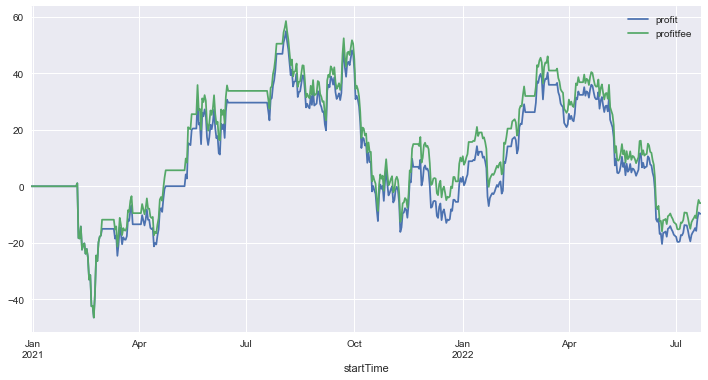

In [46]:
BS = None
buy = []
sell = []
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]

for i in range(len(btc)):

    if i == len(btc)-1:
        break

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if i == 0:
            continue
        
        if fastk[i] >= fastd[i] and fastk[i-1] < fastd[i-1] and fastd[i] < 20:
            tempSize = money / btc['open'][i+1]
            BS = 'B'
            t = i+1
            buy.append(t)
            t1 = btc.index[i+1]

        elif fastk[i] <= fastd[i] and fastk[i-1] > fastd[i-1] and fastd[i] > 80:
            tempSize = money / btc['open'][i+1]
            BS = 'S'
            t = i+1
            sellshort.append(t)
            t1 = btc.index[i+1]
        
    elif BS == 'B':
        profit = tempSize * (btc['open'][i+1] - btc['open'][i])
        profit_list.append(profit)
        t2 = btc.index[i+1]
        fundingFee = fundingPayment(df_funding, 'long', tempSize, btc.index[t], t2)
            
        if fastk[i] <= fastd[i] and fastk[i-1] > fastd[i-1] and fastd[i] > 80 or i == len(btc)-2:
            pl_round = tempSize * (btc['open'][i+1] - btc['open'][t])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate + fundingFee
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None
            
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            t1 = btc.index[i+1]
            
    elif BS == 'S': 
        profit = tempSize * (btc['open'][i] - btc['open'][i+1])
        profit_list.append(profit)
        t2 = btc.index[i+1]
        fundingFee = fundingPayment(df_funding, 'short', tempSize, btc.index[t], t2)
        
        if fastk[i] >= fastd[i] and fastk[i-1] < fastd[i-1] and fastd[i] < 20 or i == len(btc)-2:
            pl_round = tempSize * (btc['open'][t] - btc['open'][i+1])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate + fundingFee
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS=None
               
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            t1 = btc.index[i+1]
            
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=btc.index)
print(equity)
equity.plot(grid=True, figsize=(12, 6))

## 計算績效指標

In [47]:
# 實際交易位置
print(buy)
print(sell)
print(sellshort)
print(buytocover)

[140, 200, 328, 374, 468]
[167, 208, 360, 404, 567]
[38, 70, 93, 130, 213, 362, 407, 427, 445]
[60, 86, 114, 137, 324, 371, 419, 439, 465]


In [48]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()

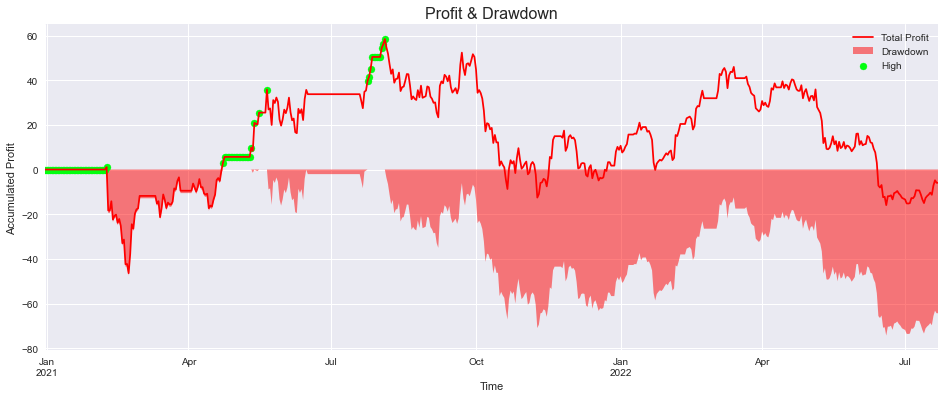

In [49]:
fig, ax = plt.subplots(figsize = (16,6))

high_index = equity[equity['profitfee'].cummax() == equity['profitfee']].index
equity['profitfee'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['profitfee'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);

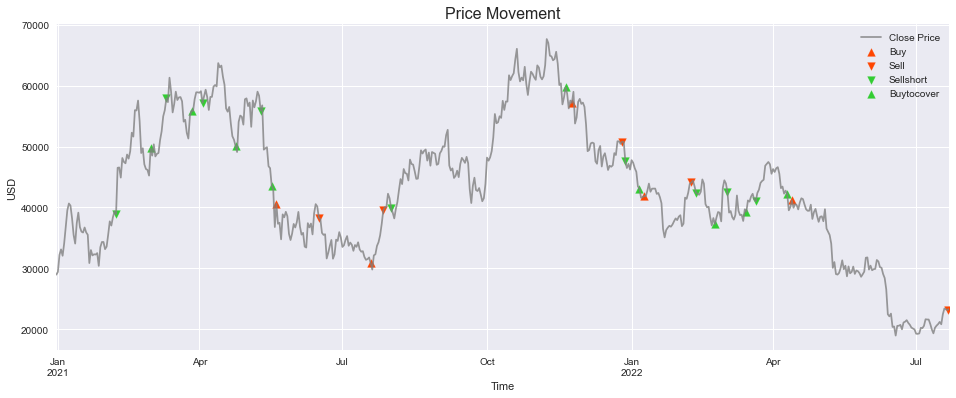

In [50]:
fig, ax = plt.subplots(figsize = (16,6))

btc['close'].plot(label = 'Close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(btc['close'].iloc[buy].index, btc['close'].iloc[buy],c = 'orangered', label = 'Buy', marker='^', s=60)
plt.scatter(btc['close'].iloc[sell].index, btc['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
plt.scatter(btc['close'].iloc[sellshort].index, btc['close'].iloc[sellshort],c = 'limegreen', label = 'Sellshort', marker='v', s=60)
plt.scatter(btc['close'].iloc[buytocover].index, btc['close'].iloc[buytocover],c = 'limegreen', label = 'Buytocover', marker='^', s=60)

plt.legend()
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 16);